In [1]:
%run LeNet_model.ipynb

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [2]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision import transforms
import torchvision.utils
import torch.utils.data as data  # 对数据进行batch的划分，在训练模型时用到此函数，用来把训练数据分成多个小组，此函数每次抛出一组数据，直至把所有数据都抛出
from matplotlib import pyplot as plt
import numpy as np
import torch.nn.functional as F

In [3]:
class Reshape(torch.nn.Module):
    def forward(self, x):  # 将图像转为(X,1,28,28)的形式，其中X为图像的数量，1*28*28为图像格式，1为通道数
        return x.view(-1, 1, 28, 28)

In [4]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [5]:
pipline_train = transforms.Compose([
    #随机旋转图片
    transforms.RandomHorizontalFlip(),
    #将图片尺寸resize到32x32
    transforms.Resize((32,32)),
    #将图片转化为Tensor格式
    transforms.ToTensor(),
    #正则化(当模型出现过拟合的情况时，用来降低模型的复杂度)
    transforms.Normalize((0.1307,),(0.3081,))    
])
pipline_test = transforms.Compose([
    #将图片尺寸resize到32x32
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))
])
# #下载数据集
# train_set = datasets.MNIST(root="./data", train=True, download=True, transform=pipline_train)
# test_set = datasets.MNIST(root="./data", train=False, download=True, transform=pipline_test)
# #加载数据集
# trainloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
# testloader = torch.utils.data.DataLoader(test_set, batch_size=32, shuffle=False)

In [6]:
def load_data_fashion_mnist(batch_seze):
    # 下载MNIST数据集然后加载到内存中
    train_dataset = datasets.MNIST(root='../data', train=True, transform=pipline_train, download=True)
    test_dataset = datasets.MNIST(root='../data', train=False, transform=pipline_test, download=True)
    return (data.DataLoader(train_dataset, batch_size, shuffle=True),
            data.DataLoader(test_dataset, batch_size, shuffle=False))

In [7]:
model = LeNet()
print(model)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [9]:
model.to(device)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [10]:
batch_size = 64
train_iter, test_iter = load_data_fashion_mnist(batch_size)
train_iter = [(x.to(device), y.to(device)) for x, y in train_iter]

In [11]:
# 损失函数
loss_function = nn.CrossEntropyLoss()
# 优化器
optimizer = torch.optim.Adam(model.parameters())

In [12]:
# 开始训练
num_epochs = 10
train_loss = []
for epoch in range(num_epochs):
    for batch_idx, (x, y) in enumerate(train_iter):
        out = model(x)
        y_onehot = F.one_hot(y, num_classes=10).float()  # 转为one-hot编码

        loss = loss_function(out, y_onehot)  # 均方差


        # 清零梯度
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        if batch_idx % 10 == 0:
            print(epoch, batch_idx, loss.item())

0 0 2.3020825386047363
0 10 2.297867774963379
0 20 2.313664436340332
0 30 2.295529365539551
0 40 2.315404176712036
0 50 2.3038692474365234
0 60 2.3076601028442383
0 70 2.3011341094970703
0 80 2.297224521636963
0 90 2.310171604156494
0 100 2.283966541290283
0 110 2.290029287338257
0 120 2.253054618835449
0 130 2.2174668312072754
0 140 2.2109293937683105
0 150 2.163780927658081
0 160 2.2040014266967773
0 170 2.243579149246216
0 180 2.201089382171631
0 190 2.1970913410186768
0 200 2.1927802562713623
0 210 2.2045350074768066
0 220 2.0658106803894043
0 230 2.069333553314209
0 240 2.082632064819336
0 250 2.100369453430176
0 260 2.11037015914917
0 270 1.9547288417816162
0 280 1.9360908269882202
0 290 2.063035011291504
0 300 2.014432907104492
0 310 1.9657847881317139
0 320 2.0310511589050293
0 330 1.9561233520507812
0 340 1.9566421508789062
0 350 1.8742858171463013
0 360 1.8707528114318848
0 370 1.9243086576461792
0 380 1.869909405708313
0 390 1.9533193111419678
0 400 1.842297077178955
0 410 1

3 520 1.6174675226211548
3 530 1.6405011415481567
3 540 1.5434235334396362
3 550 1.5922880172729492
3 560 1.680902123451233
3 570 1.5621914863586426
3 580 1.6517828702926636
3 590 1.6429386138916016
3 600 1.643819808959961
3 610 1.6564288139343262
3 620 1.6416244506835938
3 630 1.5744876861572266
3 640 1.6590580940246582
3 650 1.5699164867401123
3 660 1.5996196269989014
3 670 1.6480712890625
3 680 1.6327736377716064
3 690 1.5917353630065918
3 700 1.7062745094299316
3 710 1.537117600440979
3 720 1.6595375537872314
3 730 1.6591055393218994
3 740 1.6229385137557983
3 750 1.6029081344604492
3 760 1.5801172256469727
3 770 1.6700166463851929
3 780 1.6260597705841064
3 790 1.5560216903686523
3 800 1.5438239574432373
3 810 1.652017593383789
3 820 1.5460951328277588
3 830 1.6486389636993408
3 840 1.5892977714538574
3 850 1.6514813899993896
3 860 1.6156359910964966
3 870 1.6169835329055786
3 880 1.612581729888916
3 890 1.5470843315124512
3 900 1.6935296058654785
3 910 1.595292329788208
3 920 1.5

7 120 1.4722764492034912
7 130 1.5430889129638672
7 140 1.581490159034729
7 150 1.511672019958496
7 160 1.5081182718276978
7 170 1.524635672569275
7 180 1.5258015394210815
7 190 1.5502921342849731
7 200 1.5339722633361816
7 210 1.5531753301620483
7 220 1.4942052364349365
7 230 1.48148512840271
7 240 1.58237886428833
7 250 1.483557939529419
7 260 1.5633535385131836
7 270 1.533555507659912
7 280 1.4803134202957153
7 290 1.5242846012115479
7 300 1.5357223749160767
7 310 1.552060842514038
7 320 1.5537235736846924
7 330 1.5225547552108765
7 340 1.5616140365600586
7 350 1.5168864727020264
7 360 1.4941859245300293
7 370 1.4770705699920654
7 380 1.5537223815917969
7 390 1.5031367540359497
7 400 1.563202142715454
7 410 1.5349453687667847
7 420 1.5290908813476562
7 430 1.4985458850860596
7 440 1.4913036823272705
7 450 1.5262367725372314
7 460 1.5151026248931885
7 470 1.5626826286315918
7 480 1.484037160873413
7 490 1.5091533660888672
7 500 1.5224285125732422
7 510 1.5214385986328125
7 520 1.5263

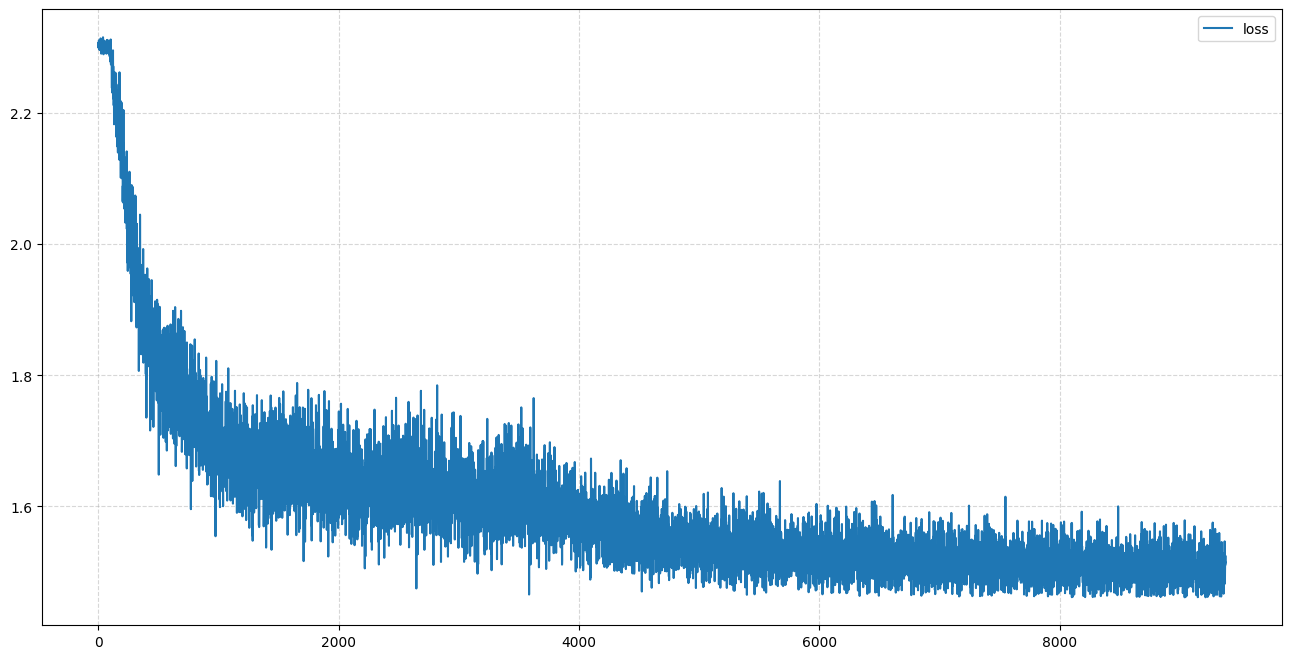

In [13]:
# 绘制损失曲线
plt.figure(figsize=(16, 8))
plt.grid(True, linestyle='--', alpha=0.5)
plt.plot(train_loss, label='loss')
plt.legend(loc="best")
plt.show()

In [14]:
# 测试准确率
total_correct = 0
model.to("cpu")
for batch_idx, (x, y) in enumerate(test_iter):
    out = model(x)
    pred = out.argmax(dim=1)
    correct = pred.eq(y).sum().float().item()
    total_correct += correct
total_num = len(test_iter.dataset)
test_acc = total_correct / total_num
print(total_correct, total_num)
print("test acc:", test_acc)

9540.0 10000
test acc: 0.954


In [15]:
weights_float16_file_path = 'LeNet_weights/model_weights.txt'

In [16]:
import struct

def float_to_float16_bin(float_num):
    # 将十进制浮点数打包为float16格式的字节
    packed_val = struct.pack('<e', float_num)
    
    # 将字节转换为整数
    int_val = struct.unpack('<H', packed_val)[0]
    
    # 将整数转换为二进制字符串，并去掉前缀'0b'
    bin_str = bin(int_val)[2:]
    
    # 补全到16位
    bin_str = bin_str.zfill(16)
    
    return bin_str


def binary_to_hex(binary_str):
    # 将二进制字符串转换为整数
    int_value = int(binary_str, 2)
    # 将整数转换为十六进制字符串，并去掉前缀'0x'
    hex_value = hex(int_value)[2:]
    return hex_value



# 打开文件准备写入
with open(weights_float16_file_path, 'w') as f:
    # 遍历模型的状态字典
    for name, param in model.state_dict().items():
        # 确保参数是浮点数，并移除梯度信息
        param_data = param.data.cpu().numpy().flatten()
        # 写入参数名称和参数值
        f.write(f'Layer: {name}\n')
        count = 1
        for value in param_data:
            value_float = value# 十进制小数
            value_binary_string = binary_to_hex(float_to_float16_bin(value_float))
            if count == 1:
                f.write(f'{value_binary_string}')
                count = count + 1;
            else:
                f.write(f'_{value_binary_string}')
        f.write('\n')  # 在每个参数后添加一个空行作为分隔

In [17]:
# 指定保存权重的路径
path_to_save_weights = 'model_weights.pth'

# 保存模型的权重
torch.save(model.state_dict(), path_to_save_weights)